## Semantic Chunking


### Semantic Chunking (clustering)

Its basically using embeddings to find clusters of semantically similar texts, these clusters will be our chunks

**all-MiniLM-L6-v2**: 384-dimensional dense vector space
~ five times faster than **all-mpnet-base-v2**

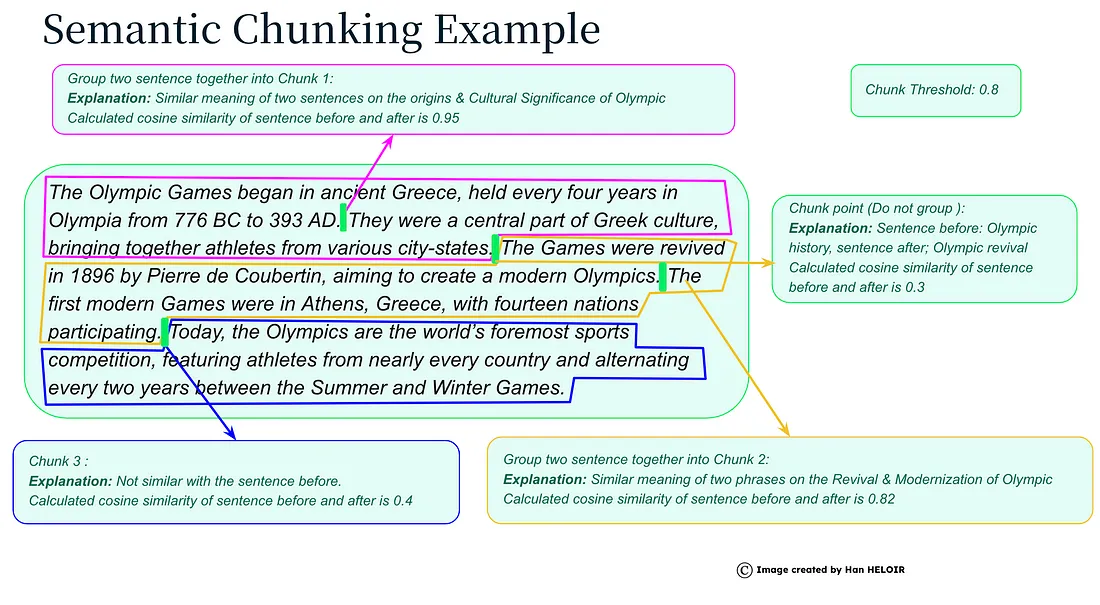


In [ ]:
%pip install transformers sentence-transformers scikit-learn

In [107]:
from model2vec import StaticModel
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize embedding models
static_embedding_model = StaticModel.from_pretrained("minishlab/potion-base-8M")

testset = pd.read_json("chunking_testset.json")


def cluster_text(texts: list[str], model, clusterer) -> list[str]:
    """Generic text clustering with embeddings and specified clusterer."""

    # embed text
    embeddings = model.encode(texts, normalize_embeddings=True)
    labels = clusterer.fit_predict(embeddings)

    # group texts into chunks based on cluster labels
    chunks = {}
    for idx, label in enumerate(labels):
        chunks.setdefault(label, []).append(texts[idx])
    # Remove noise cluster (-1) and join sentences
    return [" ".join(chunk) for label, chunk in chunks.items() if label != -1]


def compute_similarity(sentence1: str, sentence2: str) -> np.float64:
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform([sentence1, sentence2])
    similarity_matrix = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return similarity_matrix[0][0]


# Cluster using different algorithms
dbscan_chunks = cluster_text(
    testset["text"][0],
    static_embedding_model,
    DBSCAN(eps=0.5, min_samples=1, metric="cosine"),
)

agglo_chunks = cluster_text(
    testset["text"][0],
    static_embedding_model,
    AgglomerativeClustering(
        n_clusters=None, distance_threshold=0.6, metric="cosine", linkage="average"
    ),
)


def evaluate_clusters(test_data, actual_clusters) -> list[np.float64]:
    """Calculate similarity scores between actual and expected clusters."""
    return [
        compute_similarity(actual, expected)
        for actual, expected in zip(actual_clusters, test_data["expected"][0])
    ]


# Calculate and print results
dbscan_scores = evaluate_clusters(testset, dbscan_chunks)
agglo_scores = evaluate_clusters(testset, agglo_chunks)

print(
    "DBSCAN Results:\nScores:",
    dbscan_scores,
    "\nAverage:",
    sum(dbscan_scores) / len(dbscan_scores),
    "\nChunks:",
    dbscan_chunks,
)

print(
    "\nAgglomerative Results:\nScores:",
    agglo_scores,
    "\nAverage:",
    sum(agglo_scores) / len(agglo_scores),
    "\nChunks:",
    agglo_chunks,
)

ValueError: Expected 2D array, got 1D array instead:
array=[-7.72732729e-03 -9.97409150e-02 -1.92499831e-02  8.82683918e-02
 -8.11046958e-02  1.85066134e-01 -8.62656906e-02  3.46687585e-02
 -1.49922259e-02 -1.59553364e-01  1.33583963e-01  4.62509356e-02
  8.68443623e-02 -1.74188837e-01  1.81766786e-02 -6.61895145e-03
  7.38534480e-02  1.05378725e-01  7.61176571e-02  2.84415912e-02
 -3.38512883e-02 -9.86237824e-03  2.74810381e-02 -2.17444405e-01
 -2.20482759e-02  4.09022085e-02  9.54693649e-03  1.14313036e-01
 -1.73852928e-02  2.98414584e-02 -1.29384637e-01 -4.37615439e-02
  1.82887465e-02 -7.74383172e-03  9.75383297e-02 -2.92268600e-02
  2.02498615e-01  7.24770352e-02 -3.15927109e-03 -6.74129352e-02
  5.03210025e-03  5.94756864e-02  8.40150639e-02  3.18851732e-02
  1.27334695e-03 -1.47627038e-03  5.14579238e-03 -9.14778709e-02
  1.61864795e-02  7.47606205e-03 -9.09068808e-02  5.79207484e-03
 -8.93748477e-02 -4.67961207e-02  1.79349825e-01  3.12822834e-02
  5.60499206e-02 -7.33087258e-03 -6.41484186e-02 -8.82562622e-02
  3.46238259e-03 -1.54041387e-02  4.04196850e-04  1.51233990e-02
 -2.15595867e-02 -1.00576401e-01  5.08159734e-02 -2.10699588e-01
  6.30708635e-02  9.29723829e-02  1.77874655e-01  6.80778082e-03
 -7.40622580e-02  1.32954791e-01  8.54508504e-02 -1.25316009e-01
  1.60721354e-02  7.27228820e-02  5.13328612e-03 -7.17601106e-02
  9.50373616e-03 -1.37831524e-01  5.23419827e-02 -3.61488387e-02
  3.94745097e-02  1.23874746e-01 -5.64210699e-04 -4.84673819e-03
 -9.31549445e-03  9.70861223e-03  3.73565108e-02 -8.06830227e-02
  3.78999077e-02  5.49249090e-02 -5.02637811e-02 -1.84407886e-02
 -1.14322333e-02 -1.74052119e-02  1.95946041e-02  7.32684210e-02
  2.94422247e-02 -2.67752148e-02 -2.98037324e-02  6.10725358e-02
  1.94479469e-02 -2.51949858e-02  3.22566591e-02 -2.47052256e-02
 -1.10259153e-01  2.82831886e-03 -6.79345801e-02 -3.09178773e-02
  1.03951059e-01 -6.38893321e-02 -4.25324179e-02 -8.03641602e-02
  1.17370494e-01 -2.82122400e-02  2.49925014e-02  3.52749042e-02
  8.88892636e-02  9.99923516e-03 -7.38868713e-02 -1.95679292e-02
  6.59598410e-02  2.69648917e-02 -2.94711459e-02  1.15504630e-01
  8.24613646e-02  4.73558567e-02  5.15427254e-02 -1.99481752e-03
 -5.55891369e-04 -6.57687485e-02  2.77829133e-02 -1.38988998e-02
 -4.72542979e-02 -5.37258424e-02  1.03437817e-02 -2.15571113e-02
  3.27133015e-02  1.27374440e-01  5.28945029e-02  1.12176910e-02
  1.71359219e-02 -7.25752860e-02 -7.04431981e-02  9.57372189e-02
  1.12491600e-01 -2.53283679e-02 -7.35119358e-02 -5.18916138e-02
  7.66068548e-02 -9.98682901e-02 -5.32729402e-02  3.30691375e-02
  7.02978596e-02 -4.09773476e-02  4.64255586e-02  2.80677676e-02
 -5.11828177e-02  3.77384238e-02  8.28966051e-02  7.13065937e-02
  2.49410346e-02  5.32298721e-03 -1.17853982e-02 -1.48877138e-02
  3.10271624e-02  6.03535697e-02 -1.06307715e-01 -7.53284022e-02
 -3.34414607e-03 -6.55049011e-02 -4.89478931e-02  4.72291894e-02
  1.65229253e-02 -1.03479438e-01  1.76889787e-03  3.41078863e-02
  1.20552266e-02 -3.33684906e-02 -5.82737885e-02 -1.15708679e-01
  4.26784046e-02 -5.68803847e-02  1.94971692e-02 -3.01911738e-02
 -4.02412787e-02  7.66673088e-02 -5.53580374e-03 -4.80604358e-05
 -8.24491773e-03  9.73226503e-02  3.93570028e-02 -4.70521906e-03
 -9.17897373e-03  3.84595059e-02 -1.95447784e-02  3.75440195e-02
 -6.80844113e-02  3.61476727e-02 -3.50619666e-02  1.82761662e-02
  1.54601866e-02  4.39629927e-02  4.05632600e-04 -7.97558725e-02
  2.19907966e-02 -7.00804312e-03  4.10435162e-02 -1.83439581e-03
 -7.00666942e-03 -4.44195904e-02  4.30200342e-03  2.33624671e-02
 -5.20474017e-02 -9.37987026e-03  8.54723435e-03  7.36937299e-03
  2.61629131e-02  1.74029153e-02 -1.73053518e-02  8.91675055e-02
 -2.33664736e-02 -1.90826170e-02 -1.22867748e-02 -1.09925000e-02
 -3.19284499e-02 -6.20724168e-03  1.51324300e-02  4.41849455e-02
  1.45709515e-02  2.87158471e-02 -3.41699319e-03  3.19464318e-02
  5.11938930e-02 -2.90167239e-02 -1.50438920e-02  3.47329490e-02
 -3.88446450e-02  4.11484279e-02 -3.32354009e-02  2.63720490e-02
  2.35833116e-02 -4.90406435e-03 -4.40196740e-03  2.81149871e-03
 -3.95268016e-02  2.46316716e-02  1.41134765e-02  3.36825754e-03
 -1.36143281e-04  1.26954326e-02 -8.91677104e-04 -6.44315733e-03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
testset["expected"][0]

['The cat sat on the mat.',
 'Dogs are great companions. Cats and dogs are popular pets. Pets provide emotional support.',
 'The sun is shining today. It is a beautiful day.']

In [88]:
from model2vec import StaticModel
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN

static_embedding_model = StaticModel.from_pretrained("minishlab/potion-base-8M")
dense_embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

text_data = [
    "The cat sat on the mat.",
    "Dogs are great companions.",
    "The sun is shining today.",
    "Cats and dogs are popular pets.",
    "It is a beautiful day.",
    "Pets provide emotional support.",
]


def clustering_dbscan(text: list[str], model) -> list[str]:
    # create eembeddings
    embeddings = model.encode(text, normalize_embeddings=True)

    # use clustering
    clustering_model = DBSCAN(eps=0.5, min_samples=1, metric="cosine")
    labels = clustering_model.fit_predict(embeddings)

    # Create chunks based on cluster labels
    chunks = {}
    for idx, label in enumerate(labels):
        if label not in chunks:
            chunks[label] = []
        chunks[label].append(text_data[idx])

    # Filter out noise (label -1)
    chunks = {k: v for k, v in chunks.items() if k != -1}

    # Display the resulting chunks
    return [" ".join(sentences) for id, sentences in chunks.items()]


def clustering_agglomerative_clustering(text: list[str], model) -> list[str]:
    # create eembeddings
    embeddings = model.encode(text, normalize_embeddings=True)

    # Use hierarchical clustering with cosine similarity
    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0.6,  # Adjust based on desired granularity
        metric="cosine",
        linkage="average",
    )
    labels = clustering.fit_predict(embeddings)

    # Create chunks based on cluster labels
    chunks = {}
    for idx, label in enumerate(labels):
        if label not in chunks:
            chunks[label] = []
        chunks[label].append(text_data[idx])

    # Filter out noise (label -1)
    chunks = {k: v for k, v in chunks.items() if k != -1}

    # Display the resulting chunks
    return [" ".join(sentences) for id, sentences in chunks.items()]


clustering_dbscan(text_data, static_embedding_model)
clustering_agglomerative_clustering(text_data, static_embedding_model)

['The cat sat on the mat.',
 'Dogs are great companions. Cats and dogs are popular pets. Pets provide emotional support.',
 'The sun is shining today. It is a beautiful day.']

### Meta Chunking


In [35]:
text = """The advancements in renewable energy sources are critical for the future of our planet. Wind, solar, and hydroelectric power are leading the way in replacing fossil fuels. Solar energy, in particular, has seen significant progress over the last decade, becoming more affordable and efficient. As countries begin to shift their focus to renewable sources, the global energy landscape is changing rapidly.
In the context of wind energy, innovations have led to the development of larger and more efficient turbines. Offshore wind farms are becoming more common, as they offer a higher energy yield compared to land-based farms. Despite challenges such as high initial costs, wind energy is expected to play a major role in reducing carbon emissions in the coming years.
Hydroelectric power has long been a reliable source of renewable energy, but environmental concerns related to large dams are pushing the industry to explore new ways to harness water power. Small-scale hydroelectric plants are gaining traction, as they offer a more environmentally friendly solution without the need for massive infrastructure. These projects can also be implemented in remote areas, making them accessible to a wider range of communities.
The integration of different renewable energy sources into a single grid is an ongoing challenge. With solar and wind power being intermittent, energy storage solutions are needed to ensure a steady supply. Research into battery technology and grid management is accelerating to address these issues, aiming to create more resilient and reliable energy networks.
The role of government policies in driving the transition to renewable energy cannot be overstated. Many countries have introduced tax incentives, subsidies, and regulations to encourage the adoption of cleaner energy technologies. These policies are critical in supporting the growth of the renewable energy sector and ensuring that it becomes a mainstream solution to the world’s energy needs.
Electric vehicles are another key component of the renewable energy transition. By reducing reliance on gasoline and diesel, EVs help decrease greenhouse gas emissions. The increasing availability of charging infrastructure and improvements in battery efficiency are making electric vehicles more accessible to the general public.
Finally, while there has been a significant shift toward renewable energy in recent years, challenges remain in the transition to a fully sustainable energy system. Continued investment in research and development, along with strong government support, will be crucial in overcoming the remaining barriers.
"""

expected_output = [
    "The advancements in renewable energy sources are critical for the future of our planet. Wind, solar, and hydroelectric power are leading the way in replacing fossil fuels. Solar energy, in particular, has seen significant progress over the last decade, becoming more affordable and efficient. As countries begin to shift their focus to renewable sources, the global energy landscape is changing rapidly.",
    "In the context of wind energy, innovations have led to the development of larger and more efficient turbines. Offshore wind farms are becoming more common, as they offer a higher energy yield compared to land-based farms. Despite challenges such as high initial costs, wind energy is expected to play a major role in reducing carbon emissions in the coming years.",
    "Hydroelectric power has long been a reliable source of renewable energy, but environmental concerns related to large dams are pushing the industry to explore new ways to harness water power. Small-scale hydroelectric plants are gaining traction, as they offer a more environmentally friendly solution without the need for massive infrastructure. These projects can also be implemented in remote areas, making them accessible to a wider range of communities.",
    "The integration of different renewable energy sources into a single grid is an ongoing challenge. With solar and wind power being intermittent, energy storage solutions are needed to ensure a steady supply. Research into battery technology and grid management is accelerating to address these issues, aiming to create more resilient and reliable energy networks.",
    "The role of government policies in driving the transition to renewable energy cannot be overstated. Many countries have introduced tax incentives, subsidies, and regulations to encourage the adoption of cleaner energy technologies. These policies are critical in supporting the growth of the renewable energy sector and ensuring that it becomes a mainstream solution to the world’s energy needs.",
    "Electric vehicles are another key component of the renewable energy transition. By reducing reliance on gasoline and diesel, EVs help decrease greenhouse gas emissions. The increasing availability of charging infrastructure and improvements in battery efficiency are making electric vehicles more accessible to the general public.",
    "Finally, while there has been a significant shift toward renewable energy in recent years, challenges remain in the transition to a fully sustainable energy system. Continued investment in research and development, along with strong government support, will be crucial in overcoming the remaining barriers.",
]

In [24]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_path = "/media/work/learn/ai/models/llm/meta/llama-3.2-1b-Instruct/llama-3.2-1b-instruct-q8_0.gguf"
model_id = "/media/work/learn/ai/models/llm/meta/llama-3.2-1b-Instruct/"

tokenizer = AutoTokenizer.from_pretrained(model_id, gguf_file=model_path)
model = AutoModelForCausalLM.from_pretrained(model_id, gguf_file=model_path).to("cuda")

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Converting and de-quantizing GGUF tensors...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 147/147 [00:12<00:00, 11.78it/s]


In [ ]:
import torch

torch.cuda.empty_cache()

In [27]:
from typing import List
import math
from nltk.tokenize import sent_tokenize
import torch


def get_ppl_batch(
    model,
    input_ids=None,
    attention_mask=None,
    past_key_values=None,
    return_kv=False,
    end=None,
):
    past_length = 0
    if end is None:
        end = input_ids.shape[1]
    with torch.no_grad():
        response = model(
            input_ids,
            attention_mask=attention_mask,
            # past_key_values=past_key_values,
            past_key_values=None,
            use_cache=True,
        )
        past_key_values = response.past_key_values
    shift_logits = response.logits[..., :-1, :].contiguous()
    shift_labels = input_ids[..., past_length + 1 : end].contiguous()
    # Flatten the tokens
    active = (attention_mask[:, past_length:end] == 1)[..., :-1].view(-1)
    active_logits = shift_logits.view(-1, shift_logits.size(-1))[active]
    active_labels = shift_labels.view(-1)[active]
    loss_fct = torch.nn.CrossEntropyLoss(reduction="none")
    loss = loss_fct(active_logits, active_labels)
    res = loss
    return (res, past_key_values) if return_kv else res


def find_minima(values, threshold):
    minima_indices = []
    for i in range(1, len(values) - 1):
        if values[i] < values[i - 1] and values[i] < values[i + 1]:
            if (values[i - 1] - values[i] >= threshold) or (
                values[i + 1] - values[i] >= threshold
            ):
                minima_indices.append(i)
        elif values[i] < values[i - 1] and values[i] == values[i + 1]:
            if values[i - 1] - values[i] >= threshold:
                minima_indices.append(i)
    return minima_indices


def find_minima_dynamic(values, threshold, threshold_zlist):
    minima_indices = []
    for i in range(1, len(values) - 1):
        if values[i] < values[i - 1] and values[i] < values[i + 1]:
            if (values[i - 1] - values[i] >= threshold) or (
                values[i + 1] - values[i] >= threshold
            ):
                minima_indices.append(i)
                threshold_zlist.append(
                    min(values[i - 1] - values[i], values[i + 1] - values[i])
                )
        elif values[i] < values[i - 1] and values[i] == values[i + 1]:
            if values[i - 1] - values[i] >= threshold:
                minima_indices.append(i)
                threshold_zlist.append(values[i - 1] - values[i])
        if len(threshold_zlist) >= 100:
            last_ten = threshold_zlist  # [-100:]
            # avg = sum(last_ten) / len(last_ten)
            avg = min(last_ten)
            threshold = avg
    return minima_indices, threshold, threshold_zlist


def extract_by_html2text_db_chongdie(
    sub_text, model, tokenizer, threshold
) -> List[str]:
    # step 1: split in sentences
    segments = sent_tokenize(sub_text)
    segments = [item for item in segments if item.strip()]

    len_sentences = []
    input_ids = torch.tensor([[]], device=model.device, dtype=torch.long)
    attention_mask = torch.tensor([[]], device=model.device, dtype=torch.long)
    for context in segments:
        tokenized_text = tokenizer(
            context, return_tensors="pt", add_special_tokens=False
        )
        input_id = tokenized_text["input_ids"].to(model.device)
        input_ids = torch.cat([input_ids, input_id], dim=-1)
        len_sentences.append(input_id.shape[1])
        attention_mask_tmp = tokenized_text["attention_mask"].to(model.device)
        attention_mask = torch.cat([attention_mask, attention_mask_tmp], dim=-1)

    loss, past_key_values = get_ppl_batch(
        input_ids, attention_mask, past_key_values=None, return_kv=True
    )
    first_cluster_ppl = []
    index = 0
    for i in range(len(len_sentences)):
        if i == 0:
            first_cluster_ppl.append(loss[0 : len_sentences[i] - 1].mean().item())
            index += len_sentences[i] - 1
        else:
            first_cluster_ppl.append(
                loss[index : index + len_sentences[i]].mean().item()
            )
            # print(loss[index:index+len_sentences[i]])
            index += len_sentences[i]

    # print(first_cluster_ppl)
    minima_indices = find_minima(first_cluster_ppl, threshold)
    first_chunk_indices = []
    first_chunk_sentences = []
    split_points = [0] + minima_indices + [len(first_cluster_ppl) - 1]
    for i in range(len(split_points) - 1):
        tmp_index = []
        tmp_sentence = []
        # if i==0:
        #     tmp_index.append(0)
        #     tmp_sentence.append(segments[0])
        for sp_index in range(split_points[i], split_points[i + 1] + 1):
            tmp_index.append(sp_index)
            tmp_sentence.append(segments[sp_index])
        first_chunk_indices.append(tmp_index)
        first_chunk_sentences.append(tmp_sentence)
    final_chunks = []
    for sent_list in first_chunk_sentences:
        final_chunks.append("".join(sent_list))
    print("111", first_chunk_indices)
    # print('222', first_chunk_sentences)

    return final_chunks


def extract_by_html2text_db_nolist(sub_text, model, tokenizer, threshold) -> List[str]:
    segments = sent_tokenize(sub_text)
    segments = [item for item in segments if item.strip()]

    len_sentences = []
    input_ids = torch.tensor([[]], device=model.device, dtype=torch.long)
    attention_mask = torch.tensor([[]], device=model.device, dtype=torch.long)

    for context in segments:
        tokenized_text = tokenizer(
            context, return_tensors="pt", add_special_tokens=False
        )
        input_id = tokenized_text["input_ids"].to(model.device)
        input_ids = torch.cat([input_ids, input_id], dim=-1)
        len_sentences.append(input_id.shape[1])
        attention_mask_tmp = tokenized_text["attention_mask"].to(model.device)
        attention_mask = torch.cat([attention_mask, attention_mask_tmp], dim=-1)

    loss, past_key_values = get_ppl_batch(
        model, input_ids, attention_mask, past_key_values=None, return_kv=True
    )

    first_cluster_ppl = []
    index = 0
    for i in range(len(len_sentences)):
        if i == 0:
            first_cluster_ppl.append(loss[0 : len_sentences[i] - 1].mean().item())
            index += len_sentences[i] - 1
        else:
            first_cluster_ppl.append(
                loss[index : index + len_sentences[i]].mean().item()
            )
            index += len_sentences[i]

    # Detect minima indices where perplexity drops below the threshold
    minima_indices = find_minima(first_cluster_ppl, threshold)

    first_chunk_indices = []
    first_chunk_sentences = []
    split_points = [0] + minima_indices + [len(first_cluster_ppl) - 1]

    for i in range(len(split_points) - 1):
        tmp_index = []
        tmp_sentence = []
        if i == 0:
            tmp_index.append(0)
            tmp_sentence.append(segments[0])
        for sp_index in range(split_points[i] + 1, split_points[i + 1] + 1):
            tmp_index.append(sp_index)
            tmp_sentence.append(segments[sp_index])
        first_chunk_indices.append(tmp_index)
        first_chunk_sentences.append(tmp_sentence)

    final_chunks = []
    for sent_list in first_chunk_sentences:
        final_chunks.append("".join(sent_list))

    return final_chunks


def extract_by_html2text_db_dynamic(
    sub_text, model, tokenizer, threshold, threshold_zlist, language="zh"
) -> List[str]:
    temp_para = sub_text
    if language == "zh":
        # text = re.sub(r'[\t\n\r\f\v]', '', temp_para)
        # cleaned_text = re.sub(r'  ', '', text)
        cleaned_text = temp_para
    else:
        cleaned_text = temp_para

    segments = split_text_by_punctuation(cleaned_text, language)
    segments = [item for item in segments if item.strip()]
    ch = Chunking(model, tokenizer)
    len_sentences = []
    input_ids = torch.tensor([[]], device=model.device, dtype=torch.long)
    attention_mask = torch.tensor([[]], device=model.device, dtype=torch.long)
    for context in segments:
        tokenized_text = tokenizer(
            context, return_tensors="pt", add_special_tokens=False
        )
        input_id = tokenized_text["input_ids"].to(model.device)
        input_ids = torch.cat([input_ids, input_id], dim=-1)
        len_sentences.append(input_id.shape[1])
        attention_mask_tmp = tokenized_text["attention_mask"].to(model.device)
        attention_mask = torch.cat([attention_mask, attention_mask_tmp], dim=-1)

    loss, past_key_values = ch.get_ppl_batch(
        input_ids, attention_mask, past_key_values=None, return_kv=True
    )
    first_cluster_ppl = []
    index = 0
    for i in range(len(len_sentences)):
        if i == 0:
            first_cluster_ppl.append(loss[0 : len_sentences[i] - 1].mean().item())
            index += len_sentences[i] - 1
        else:
            first_cluster_ppl.append(
                loss[index : index + len_sentences[i]].mean().item()
            )
            # print(loss[index:index+len_sentences[i]])
            index += len_sentences[i]

    # print(first_cluster_ppl)
    minima_indices, threshold, threshold_zlist = find_minima_dynamic(
        first_cluster_ppl, threshold, threshold_zlist
    )
    first_chunk_indices = []
    first_chunk_sentences = []
    split_points = [0] + minima_indices + [len(first_cluster_ppl) - 1]
    for i in range(len(split_points) - 1):
        tmp_index = []
        tmp_sentence = []
        if i == 0:
            tmp_index.append(0)
            tmp_sentence.append(segments[0])
        for sp_index in range(split_points[i] + 1, split_points[i + 1] + 1):
            tmp_index.append(sp_index)
            tmp_sentence.append(segments[sp_index])
        first_chunk_indices.append(tmp_index)
        first_chunk_sentences.append(tmp_sentence)
    final_chunks = []
    for sent_list in first_chunk_sentences:
        final_chunks.append("".join(sent_list))
    print("111", first_chunk_indices)
    # print('222', first_chunk_sentences)
    # temp_para经过困惑度分组
    return final_chunks, threshold, threshold_zlist


def extract_by_html2text_db_dynamic_batch(
    sub_text,
    model,
    tokenizer,
    threshold,
    threshold_zlist,
    language="zh",
    past_key_values=None,
) -> List[str]:  # 不重叠
    temp_para = sub_text

    if language == "zh":
        # text = re.sub(r'[\t\n\r\f\v]', '', temp_para)
        # cleaned_text = re.sub(r'  ', '', text)
        cleaned_text = temp_para
    else:
        cleaned_text = temp_para

    segments = split_text_by_punctuation(cleaned_text, language)
    segments = [item for item in segments if item.strip()]
    ch = Chunking(model, tokenizer)
    len_sentences = []
    input_ids = torch.tensor([[]], device=model.device, dtype=torch.long)
    attention_mask = torch.tensor([[]], device=model.device, dtype=torch.long)
    for context in segments:
        tokenized_text = tokenizer(
            context, return_tensors="pt", add_special_tokens=False
        )
        input_id = tokenized_text["input_ids"].to(model.device)
        input_ids = torch.cat([input_ids, input_id], dim=-1)
        len_sentences.append(input_id.shape[1])
        attention_mask_tmp = tokenized_text["attention_mask"].to(model.device)
        attention_mask = torch.cat([attention_mask, attention_mask_tmp], dim=-1)

    batch_size = 4096  # 6000

    total_batches = math.ceil(input_ids.shape[1] / batch_size)
    loss = torch.tensor([], device=model.device, dtype=torch.long)
    for i in range(total_batches):
        start = i * batch_size
        end = start + batch_size
        input_ids_tmp = input_ids[:, start:end]

        attention_mask_tmp = attention_mask[:, :end]
        input_ids_tmp = torch.cat(
            [
                tokenizer(" ", return_tensors="pt", add_special_tokens=False)[
                    "input_ids"
                ].to(model.device),
                input_ids_tmp,
            ],
            dim=-1,
        )
        attention_mask_tmp = torch.cat(
            [
                attention_mask_tmp,
                torch.ones((1, i + 1), device=model.device, dtype=torch.long),
            ],
            dim=-1,
        )

        size = input_ids_tmp.shape[1]
        if attention_mask_tmp.shape[1] > 24576:  # 72000
            past_key_values = [
                [k[:, :, size + 1 :], v[:, :, size + 1 :]] for k, v in past_key_values
            ]
            attention_mask_tmp = attention_mask_tmp[
                :, attention_mask_tmp.shape[1] - size - past_key_values[0][0].shape[2] :
            ]
            # print('111',attention_mask_tmp.shape,past_key_values[0][0].shape[2])

        loss_tmp, past_key_values = ch.get_ppl_batch(
            input_ids_tmp,
            attention_mask_tmp,
            past_key_values=past_key_values,
            return_kv=True,
        )
        loss = torch.cat([loss, loss_tmp], dim=-1)
        # print(input_ids_tmp.shape,attention_mask_tmp.shape,past_key_values[0][0].shape[2],loss.shape)

    first_cluster_ppl = []
    index = 0
    for i in range(len(len_sentences)):
        if i == 0:
            first_cluster_ppl.append(loss[1 : len_sentences[i]].mean().item())
            # index+=len_sentences[i]-1
        else:
            first_cluster_ppl.append(
                loss[index : index + len_sentences[i]].mean().item()
            )
            # print(loss[index:index+len_sentences[i]])
        index += len_sentences[i]

    # print(first_cluster_ppl)
    minima_indices, threshold, threshold_zlist = find_minima_dynamic(
        first_cluster_ppl, threshold, threshold_zlist
    )
    first_chunk_indices = []
    first_chunk_sentences = []
    split_points = [0] + minima_indices + [len(first_cluster_ppl) - 1]
    for i in range(len(split_points) - 1):
        tmp_index = []
        tmp_sentence = []
        if i == 0:
            tmp_index.append(0)
            tmp_sentence.append(segments[0])
        for sp_index in range(split_points[i] + 1, split_points[i + 1] + 1):
            tmp_index.append(sp_index)
            tmp_sentence.append(segments[sp_index])
        first_chunk_indices.append(tmp_index)
        first_chunk_sentences.append(tmp_sentence)
    final_chunks = []
    for sent_list in first_chunk_sentences:
        final_chunks.append("".join(sent_list))
    print("111", first_chunk_indices)
    # print('222', first_chunk_sentences)
    # temp_para经过困惑度分组
    return final_chunks, threshold, threshold_zlist


def extract_by_html2text_db_bench(
    sub_text: str,
    model,
    tokenizer,
    threshold: float,
    batch_size: int = 4096,
    max_txt_size: int = 9000,
    past_key_values=None,
) -> List[str]:
    """
    Chunk a large text into smaller pieces based on perplexity scores.

    Args:
        sub_text (str): Input text to be chunked.
        model: Language model for calculating perplexity.
        tokenizer: Tokenizer for the language model.
        threshold (float): Threshold for identifying chunk boundaries.
        batch_size (int): Number of tokens processed in each batch.
        max_txt_size (int): Maximum allowable size for input text.
        past_key_values: Cached key-value pairs for memory-efficient processing.

    Returns:
        List[str]: List of segmented chunks of text.
    """
    sentences_length = []
    input_ids = torch.tensor([[]], device=model.device, dtype=torch.long)
    attention_mask = torch.tensor([[]], device=model.device, dtype=torch.long)

    # Step 1: Split the text into sentences and clean
    segments = [item.strip() for item in sent_tokenize(sub_text) if item.strip()]

    # Step 2: Tokenize sentences and combine input IDs and attention masks
    for context in segments:
        tokenized_text = tokenizer(
            context, return_tensors="pt", add_special_tokens=False
        )
        input_id = tokenized_text["input_ids"].to(model.device)
        input_ids = torch.cat([input_ids, input_id], dim=-1)
        sentences_length.append(input_id.shape[1])
        attention_mask_tmp = tokenized_text["attention_mask"].to(model.device)
        attention_mask = torch.cat([attention_mask, attention_mask_tmp], dim=-1)

    # Step 3: Process the tokens in batches
    total_batches = math.ceil(input_ids.shape[1] / batch_size)
    print("Total input tokens:", input_ids.shape[1])

    loss = torch.tensor([], device=model.device, dtype=torch.long)
    for i in range(total_batches):
        start = i * batch_size
        end = start + batch_size
        input_ids_tmp = input_ids[:, start:end]
        attention_mask_tmp = attention_mask[:, :end]

        # Add padding token at the start for context
        input_ids_tmp = torch.cat(
            [
                tokenizer(" ", return_tensors="pt", add_special_tokens=False)[
                    "input_ids"
                ].to(model.device),
                input_ids_tmp,
            ],
            dim=-1,
        )
        attention_mask_tmp = torch.cat(
            [
                attention_mask_tmp,
                torch.ones((1, i + 1), device=model.device, dtype=torch.long),
            ],
            dim=-1,
        )

        # Handle maximum text size by pruning cached key-values
        size = input_ids_tmp.shape[1]
        if attention_mask_tmp.shape[1] > max_txt_size:
            past_key_values = [
                [k[:, :, size + 1 :], v[:, :, size + 1 :]] for k, v in past_key_values
            ]
            attention_mask_tmp = attention_mask_tmp[
                :, attention_mask_tmp.shape[1] - size - past_key_values[0][0].shape[2] :
            ]

        # Calculate perplexity loss for the current batch
        assert isinstance(input_ids, torch.Tensor), (
            "input_ids debe ser un tensor de PyTorch"
        )
        assert isinstance(attention_mask, torch.Tensor), (
            "attention_mask debe ser un tensor de PyTorch"
        )
        # if past_key_values is not None:
        #   print (type (past_key_values))
        #   assert isinstance(past_key_values, list), "past_key_values debe ser una lista"
        #   for i, kv in enumerate(past_key_values):
        #       assert isinstance(kv, tuple) and len(kv) == 2, f"Elemento {i} de past_key_values no es un par de tuplas"

        loss_tmp, past_key_values = get_ppl_batch(
            model,
            input_ids_tmp,
            attention_mask_tmp,
            past_key_values=past_key_values,
            return_kv=True,
        )
        loss = torch.cat([loss, loss_tmp], dim=-1)

    # Step 4: Compute perplexity for each sentence
    first_cluster_ppl = []
    index = 0
    for i in range(len(sentences_length)):
        if i == 0:
            first_cluster_ppl.append(loss[1 : sentences_length[i]].mean().item())
        else:
            first_cluster_ppl.append(
                loss[index : index + sentences_length[i]].mean().item()
            )
        index += sentences_length[i]

    # Step 5: Identify minima in perplexity scores
    minima_indices = find_minima(first_cluster_ppl, threshold)

    # Step 6: Create text chunks based on minima
    split_points = [0] + minima_indices + [len(first_cluster_ppl) - 1]
    final_chunks = []
    for i in range(len(split_points) - 1):
        chunk = "".join(segments[split_points[i] + 1 : split_points[i + 1] + 1])
        final_chunks.append(chunk)

    print("Chunk indices:", split_points)
    return final_chunks


def llm_chunker_ppl(
    sub_text,
    model,
    tokenizer,
    threshold,
    batch_size=4096,
    max_txt_size=9000,
    dynamic_merge=False,
    target_size=200,
) -> List[str]:
    txt_length = len(sub_text.split())

    if txt_length <= 4096:
        new_final_chunks = extract_by_html2text_db_nolist(
            sub_text, model, tokenizer, threshold
        )
    else:
        new_final_chunks = extract_by_html2text_db_bench(
            sub_text, model, tokenizer, threshold, batch_size, max_txt_size
        )

    if dynamic_merge:
        merged_paragraphs = []
        current_paragraph = ""
        for paragraph in new_final_chunks:
            # Check if adding a new paragraph to the current paragraph exceeds the target size
            if len(current_paragraph.split()) + len(paragraph.split()) <= target_size:
                current_paragraph += " " + paragraph
            else:
                merged_paragraphs.append(current_paragraph)
                current_paragraph = paragraph
        if current_paragraph:
            merged_paragraphs.append(current_paragraph)
        return merged_paragraphs

    return new_final_chunks

In [46]:
# with open("../docs/attention-is-all-you-need/attention-is-all-you-need.md") as f:
#     text = f.read()

chunks = llm_chunker_ppl(
    sub_text=text,
    model=model,
    tokenizer=tokenizer,
    threshold=0.4,
    batch_size=1024,
    dynamic_merge=True,
    target_size=200,
)

i = 1
for chunk in chunks:
    print(f"\nNumber {i}: \n", chunk)
    i += 1


Number 1: 
  The advancements in renewable energy sources are critical for the future of our planet.Wind, solar, and hydroelectric power are leading the way in replacing fossil fuels. Solar energy, in particular, has seen significant progress over the last decade, becoming more affordable and efficient.As countries begin to shift their focus to renewable sources, the global energy landscape is changing rapidly.In the context of wind energy, innovations have led to the development of larger and more efficient turbines.Offshore wind farms are becoming more common, as they offer a higher energy yield compared to land-based farms.Despite challenges such as high initial costs, wind energy is expected to play a major role in reducing carbon emissions in the coming years. Hydroelectric power has long been a reliable source of renewable energy, but environmental concerns related to large dams are pushing the industry to explore new ways to harness water power.Small-scale hydroelectric plants 

In [50]:
def test_chunking_algorithm():
    # Sample text
    text = """The advancements in renewable energy sources are critical for the future of our planet. Wind, solar, and hydroelectric power are leading the way in replacing fossil fuels. Solar energy, in particular, has seen significant progress over the last decade, becoming more affordable and efficient. As countries begin to shift their focus to renewable sources, the global energy landscape is changing rapidly.
    In the context of wind energy, innovations have led to the development of larger and more efficient turbines. Offshore wind farms are becoming more common, as they offer a higher energy yield compared to land-based farms. Despite challenges such as high initial costs, wind energy is expected to play a major role in reducing carbon emissions in the coming years.
    Hydroelectric power has long been a reliable source of renewable energy, but environmental concerns related to large dams are pushing the industry to explore new ways to harness water power. Small-scale hydroelectric plants are gaining traction, as they offer a more environmentally friendly solution without the need for massive infrastructure. These projects can also be implemented in remote areas, making them accessible to a wider range of communities.
    The integration of different renewable energy sources into a single grid is an ongoing challenge. With solar and wind power being intermittent, energy storage solutions are needed to ensure a steady supply. Research into battery technology and grid management is accelerating to address these issues, aiming to create more resilient and reliable energy networks.
    The role of government policies in driving the transition to renewable energy cannot be overstated. Many countries have introduced tax incentives, subsidies, and regulations to encourage the adoption of cleaner energy technologies. These policies are critical in supporting the growth of the renewable energy sector and ensuring that it becomes a mainstream solution to the world’s energy needs.
    Electric vehicles are another key component of the renewable energy transition. By reducing reliance on gasoline and diesel, EVs help decrease greenhouse gas emissions. The increasing availability of charging infrastructure and improvements in battery efficiency are making electric vehicles more accessible to the general public.
    Finally, while there has been a significant shift toward renewable energy in recent years, challenges remain in the transition to a fully sustainable energy system. Continued investment in research and development, along with strong government support, will be crucial in overcoming the remaining barriers.
    """

    expected_output = [
        "The advancements in renewable energy sources are critical for the future of our planet. Wind, solar, and hydroelectric power are leading the way in replacing fossil fuels. Solar energy, in particular, has seen significant progress over the last decade, becoming more affordable and efficient. As countries begin to shift their focus to renewable sources, the global energy landscape is changing rapidly.",
        "In the context of wind energy, innovations have led to the development of larger and more efficient turbines. Offshore wind farms are becoming more common, as they offer a higher energy yield compared to land-based farms. Despite challenges such as high initial costs, wind energy is expected to play a major role in reducing carbon emissions in the coming years.",
        "Hydroelectric power has long been a reliable source of renewable energy, but environmental concerns related to large dams are pushing the industry to explore new ways to harness water power. Small-scale hydroelectric plants are gaining traction, as they offer a more environmentally friendly solution without the need for massive infrastructure. These projects can also be implemented in remote areas, making them accessible to a wider range of communities.",
        "The integration of different renewable energy sources into a single grid is an ongoing challenge. With solar and wind power being intermittent, energy storage solutions are needed to ensure a steady supply. Research into battery technology and grid management is accelerating to address these issues, aiming to create more resilient and reliable energy networks.",
        "The role of government policies in driving the transition to renewable energy cannot be overstated. Many countries have introduced tax incentives, subsidies, and regulations to encourage the adoption of cleaner energy technologies. These policies are critical in supporting the growth of the renewable energy sector and ensuring that it becomes a mainstream solution to the world’s energy needs.",
        "Electric vehicles are another key component of the renewable energy transition. By reducing reliance on gasoline and diesel, EVs help decrease greenhouse gas emissions. The increasing availability of charging infrastructure and improvements in battery efficiency are making electric vehicles more accessible to the general public.",
        "Finally, while there has been a significant shift toward renewable energy in recent years, challenges remain in the transition to a fully sustainable energy system. Continued investment in research and development, along with strong government support, will be crucial in overcoming the remaining barriers.",
    ]

    # Run the chunking function on the sample text
    actual_output = llm_chunker_ppl(
        sub_text=text,
        model=model,
        tokenizer=tokenizer,
        threshold=0.4,
        batch_size=1024,
        dynamic_merge=True,
        target_size=50,
    )

    # Test if the output matches the expected output
    for i, chunk in enumerate(actual_output):
        print(f"chunk {i}")
        print("similarity:", compute_similarity(chunk, expected_output[i]))
        print(chunk)


def test_small():
    text = "The cat sat on the mat. Dogs are great companions. The sun is shining today. Cats and dogs are popular pets. It is a beautiful day. Pets provide emotional support."

    expected_output = [
        "The cat sat on the mat.",
        "Dogs are great companions. The sun is shining today. Cats and dogs are popular pets.",
        "It is a beautiful day. Pets provide emotional support.",
    ]

    actual_output = llm_chunker_ppl(
        sub_text=text,
        model=model,
        tokenizer=tokenizer,
        threshold=0.8,
        batch_size=1024,
        dynamic_merge=False,
        target_size=10,
    )

    # Test if the output matches the expected output
    for i, chunk in enumerate(actual_output):
        print(f"chunk {i}")
        print("similarity:", compute_similarity(chunk, expected_output[i]))
        print(chunk)


test_chunking_algorithm()
# test_small()

chunk 0
similarity: 0.6633888351390873
 The advancements in renewable energy sources are critical for the future of our planet.Wind, solar, and hydroelectric power are leading the way in replacing fossil fuels.
chunk 1
similarity: 0.798001294804459
Solar energy, in particular, has seen significant progress over the last decade, becoming more affordable and efficient.As countries begin to shift their focus to renewable sources, the global energy landscape is changing rapidly.In the context of wind energy, innovations have led to the development of larger and more efficient turbines.Offshore wind farms are becoming more common, as they offer a higher energy yield compared to land-based farms.Despite challenges such as high initial costs, wind energy is expected to play a major role in reducing carbon emissions in the coming years.
chunk 2
similarity: 0.8722866329027822
Hydroelectric power has long been a reliable source of renewable energy, but environmental concerns related to large dam